In [103]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

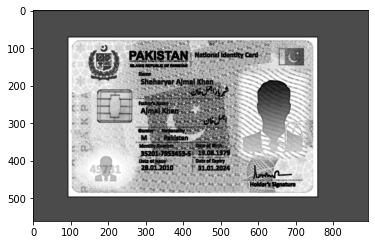

In [125]:
baseImg = cv2.imread('1.jpg')
baseImg = cv2.cvtColor(baseImg, cv2.COLOR_BGR2GRAY)
#Declare image size, width height and chanel
baseH, baseW = baseImg.shape

baseImg = cv2.erode(baseImg, None, iterations=1)
# baseImg = cv2.dilate(baseImg, None, iterations=1)

# baseImg = cv2.equalizeHist(baseImg)


plt.imshow(baseImg, cmap=plt.get_cmap('gray'))

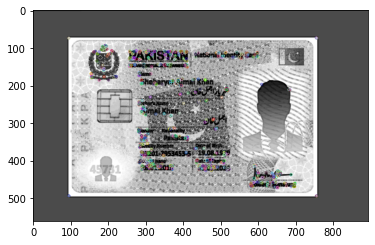

In [126]:
#Init orb, keypoints detection on base Image
orb = cv2.ORB_create(1000)

kp, des = orb.detectAndCompute(baseImg, None)
imgKp = cv2.drawKeypoints(baseImg,kp, None)
plt.imshow(imgKp)

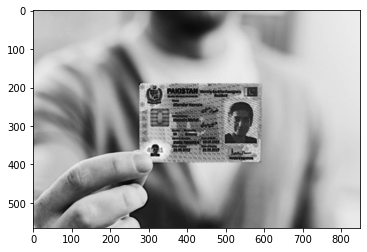

In [127]:
img2 = cv2.imread('cnic.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)


img2 = cv2.erode(img2, None, iterations=1)
# img2 = cv2.dilate(img2, None, iterations=1)

# img2 = cv2.equalizeHist(img2)


plt.imshow(img2,cmap=plt.get_cmap('gray'))

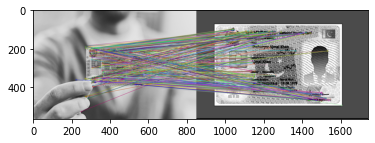

In [130]:
PER_MATCH = 0.50

#Detect keypoint on img2
kp1, des1 = orb.detectAndCompute(img2, None)

#Init BF Matcher, find the matches points of two images
bf = cv2.BFMatcher(cv2.NORM_HAMMING)
matches = list(bf.match(des1, des))

#Select top 30% best matcher 
matches.sort(key=lambda x: x.distance)
best_matches = matches[:int(len(matches)*PER_MATCH)]

#Show match img  
imgMatch = cv2.drawMatches(img2, kp1, baseImg, kp, best_matches,None, flags=2)
plt.imshow(imgMatch)

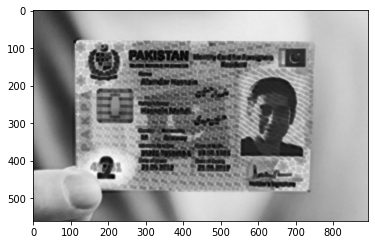

In [131]:
#Init source points and destination points for findHomography function.
srcPoints = np.float32([kp1[m.queryIdx].pt for m in best_matches]).reshape(-1,1,2)
dstPoints = np.float32([kp[m.trainIdx].pt for m in best_matches]).reshape(-1,1,2)


#Find Homography of two images
matrix_relationship, _ = cv2.findHomography(srcPoints, dstPoints,cv2.RANSAC, 5.0)

#Transform the image to have the same structure as the base image
img_final = cv2.warpPerspective(img2, matrix_relationship, (baseW, baseH))
plt.imshow(img_final,cmap=plt.get_cmap('gray'))